<h1>
<font color="#faf200">Steganalysis</font>
</h1>

In [1]:
import numpy as np
from PIL import Image

<h2>
<font color="#ad41fa">Encode function</font>
</h2>

In [2]:
def Encode(src, message, dest):

    img = Image.open(src, 'r')
    width, height = img.size
    array = np.array(list(img.getdata()))
    print(img.mode)

    if img.mode == 'RGB':
        n = 3
    elif img.mode == 'RGBA':
        n = 4
    total_pixels = array.size//n

    message += "$t3g0"
    b_message = ''.join([format(ord(i), "08b") for i in message])
    req_pixels = len(b_message)

    if req_pixels > total_pixels:
        print("ERROR: Need larger file size")

    else:
        index=0
        for p in range(total_pixels):
            for q in range(0, 3):
                if index < req_pixels:
                    array[p][q] = int(bin(array[p][q])[2:9] + b_message[index], 2)
                    index += 1

        array=array.reshape(height, width, n)
        enc_img = Image.fromarray(array.astype('uint8'), img.mode)
        enc_img.save(dest)
        print("Image Encoded Successfully")

<h2>
<font color="#ad41fa">Decode function</font>
</h2>

In [3]:
def Decode(src):

    img = Image.open(src, 'r')
    array = np.array(list(img.getdata()))

    if img.mode == 'RGB':
        n = 3
    elif img.mode == 'RGBA':
        n = 4
    total_pixels = array.size//n

    hidden_bits = ""
    for p in range(total_pixels):
        for q in range(0, 3):
            hidden_bits += (bin(array[p][q])[2:][-1])

    hidden_bits = [hidden_bits[i:i+8] for i in range(0, len(hidden_bits), 8)]

    message = ""
    for i in range(len(hidden_bits)):
        if message[-5:] == "$t3g0":
            break
        else:
            message += chr(int(hidden_bits[i], 2))
    if "$t3g0" in message:
        print("Hidden Message:", message[:-5])
    else:
        print("No Hidden Message Found")

<h2>
<font color="#ad41fa">Menu</font>
</h2>

In [4]:
def Stego():
    print("--Welcome to $t3g0--")
    print("1: Encode")
    print("2: Decode")

    func = input()

    if func == '1':
        print("Enter Source Image Path")
        src = input()
        print("Enter Message to Hide")
        message = input()
        print("Enter Destination Image Path")
        dest = input()
        print("Encoding...")
        Encode(src, message, dest)

    elif func == '2':
        print("Enter Source Image Path")
        src = input()
        print("Decoding...")
        Decode(src)

    else:
        print("ERROR: Invalid option chosen")

<h2>
<font color="#ad41fa">Encode the input image</font>
</h2>

In [5]:
if __name__ == "__main__":
    Stego()

--Welcome to $t3g0--
1: Encode
2: Decode
1
Enter Source Image Path
1.png
Enter Message to Hide
Security
Enter Destination Image Path
2.png
Encoding...
RGBA
Image Encoded Successfully


<h2>
<font color="#ad41fa">Show the encoded image</font>
</h2>

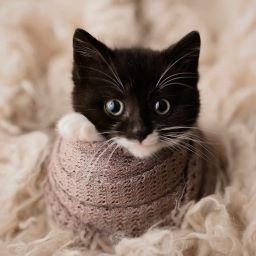

In [6]:
encode = Image.open("2.png")
encode.show()

<h2>
<font color="#ad41fa">Decode the encoded image</font>
</h2>

In [7]:
if __name__ == "__main__":
    Stego()

--Welcome to $t3g0--
1: Encode
2: Decode
2
Enter Source Image Path
2.png
Decoding...
Hidden Message: Security
